In [ ]:
using QuantumAnnealingTools
using Printf
using Plots
using Plots.Measures

# Example of Bath Correlation Function
## Ohmic Bath
### Weak coupling limit
Let's first create an Ohmic bath object with the following choice of parameters:

In [2]:
η = 1e-4; fc=4; T=16
bath = Ohmic(η, fc, T)

Ohmic bath instance:
η (unitless): 0.0001
ωc (GHz): 4.0
T (mK): 16.0

These parameters lie in the weak coupling regime. We can plot its two-point correlation function

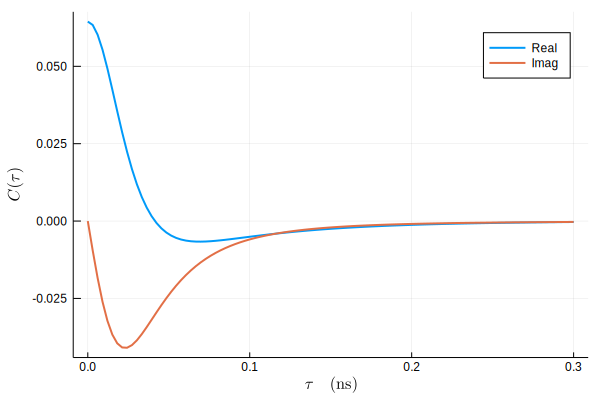

In [3]:
τ_axis = range(0,0.3,length=100)
c = [correlation(τ, bath) for τ in τ_axis]
plot(τ_axis, real.(c), linewidth=2, label="Real")
plot!(τ_axis, imag.(c), linewidth=2, label="Imag")
xlabel!(L"\tau \quad (\mathrm{ns})")
ylabel!(L"C(\tau)")

We can also calculate the bath correlation time $\tau_B$ as defined in [Evgeny Mozgunov and Daniel Lidar](https://arxiv.org/pdf/1908.01095.pdf). $1/\tau_{SB} \ll 1$ suggests the weak coupling limit and $\tau_B \ll 1$ suggests the fast bath.

In [4]:
cfun(x) = correlation(x, bath)
τsb, esb = τ_SB(cfun)
τb, eb = τ_B(cfun, 2000, τsb)
println("τ_sb is " * @sprintf("%.2f", τsb))
println("τ_b is " * @sprintf("%.2e", τb))

τ_sb is 284.61
τ_b is 9.06e-02


The spectrum density of the bath can be convinently plotted with the following syntax.

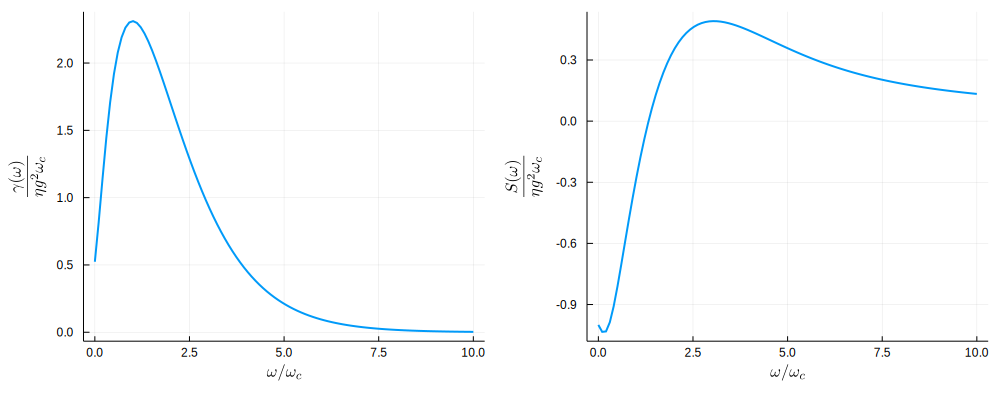

In [5]:
p1 = plot(bath, :γ, range(0, 10, length=100), linewidth=2, label="")
p2 = plot(bath, :S, range(0, 10, length=100), linewidth=2, label="")
plot(p1, p2, size=(1000, 400), left_margin=5mm, bottom_margin=5mm)

The polaron transformed correlation function can be calculated using function `polaron_correlation`. An overview on the polaron transformed approach can be found in [Xu, Dazhi, and Jianshu Cao](https://link.springer.com/article/10.1007%2Fs11467-016-0540-2]).

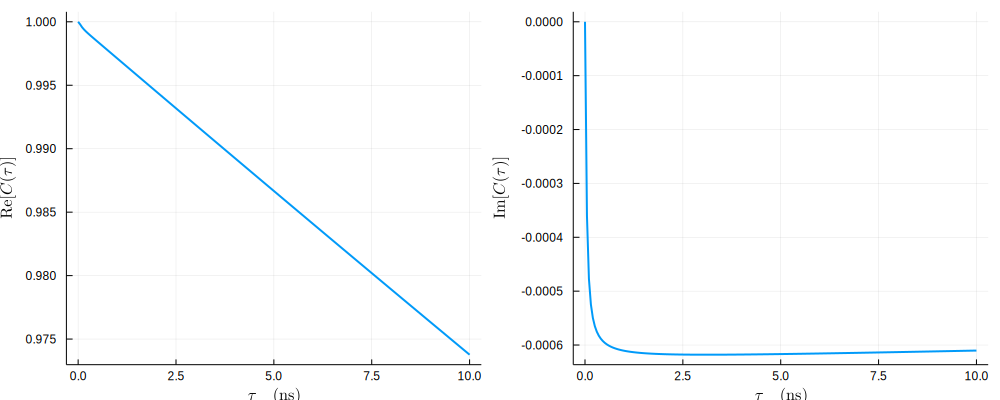

In [6]:
τ_axis = range(0,10,length=200)
pc = [polaron_correlation(τ, 4.0, bath) for τ in τ_axis]
p1 = plot(τ_axis, real.(pc), linewidth=2, label="")
xlabel!(L"\tau \quad (\mathrm{ns})")
ylabel!(L"\mathrm{Re}[C(\tau)]")
p2 = plot(τ_axis, imag.(pc), linewidth=2, label="")
xlabel!(L"\tau \quad (\mathrm{ns})")
ylabel!(L"\mathrm{Im}[C(\tau)]")
plot(p1, p2, layout=(1,2), size=(1000, 400))

Above figures are the polaron transformed correlation function. If we canclate $\tau_{SB}$ and $\tau_B$ in this case 

In [7]:
cfun(x) = polaron_correlation(x, 4.0, bath)
τsb, esb = τ_SB(cfun)
τb, eb = τ_B(cfun, 2000, τsb)
println("τ_sb is " * @sprintf("%.2f", τsb))
println("τ_b is " * @sprintf("%.2e", τb))

τ_sb is 0.01
τ_b is 5.14e+01


the transformed bath becomes strong and slow.
### Strong coupling limit
We can also try other choices of parameters. For example, increasing $\eta$ will take us to the strong coupling limit.

In [8]:
η = 1; fc=4; T=16
bath = Ohmic(η, fc, T)

Ohmic bath instance:
η (unitless): 1.0
ωc (GHz): 4.0
T (mK): 16.0

If we look at $\tau_{SB}$ and $\tau_B$ before/after polaron transformation:

In [9]:
cfun(x) = correlation(x, bath)
τsb, esb = τ_SB(cfun)
τb, eb = τ_B(cfun, 2000, τsb)
println("Before polaron transformation:")
println("τ_sb is " * @sprintf("%.2f", τsb))
println("τ_b is " * @sprintf("%.2e", τb))
cfun(x) = polaron_correlation(x, 4.0, bath)
τsb, esb = τ_SB(cfun)
τb, eb = τ_B(cfun, 2000, τsb)
println("After polaron transformation:")
println("τ_sb is " * @sprintf("%.2f", τsb))
println("τ_b is " * @sprintf("%.2e", τb))

Before polaron transformation:
τ_sb is 0.03
τ_b is 9.06e-02
After polaron transformation:
τ_sb is 33.10
τ_b is 2.30e-02


We can see that polaron transformation reduces the effective coupling strength of the bath.

### Slow bath
The last case we consider for Ohmic bath is a "slow" Ohmic bath strongly coupling to the system. To make a "slow" Ohmic bath, we choose a very small cutoff frequency.

In [10]:
η = 1; fc=0.1; T=16
bath = Ohmic(η, fc, T)

Ohmic bath instance:
η (unitless): 1.0
ωc (GHz): 0.1
T (mK): 16.0

The bath correlation function before polaron transformation is

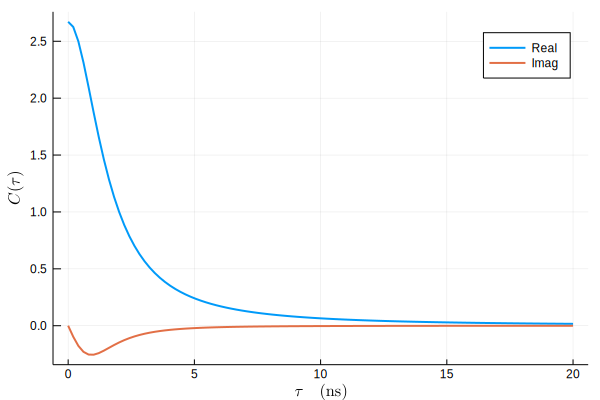

In [11]:
τ_axis = range(0,20,length=100)
c = [correlation(τ, bath) for τ in τ_axis]
plot(τ_axis, real.(c), linewidth=2, label="Real")
plot!(τ_axis, imag.(c), linewidth=2, label="Imag")
xlabel!(L"\tau \quad (\mathrm{ns})")
ylabel!(L"C(\tau)")

Comparing with the untransformed case, the bath correlation function has a longer tail. After the polaron transformation, the bath correlation function is

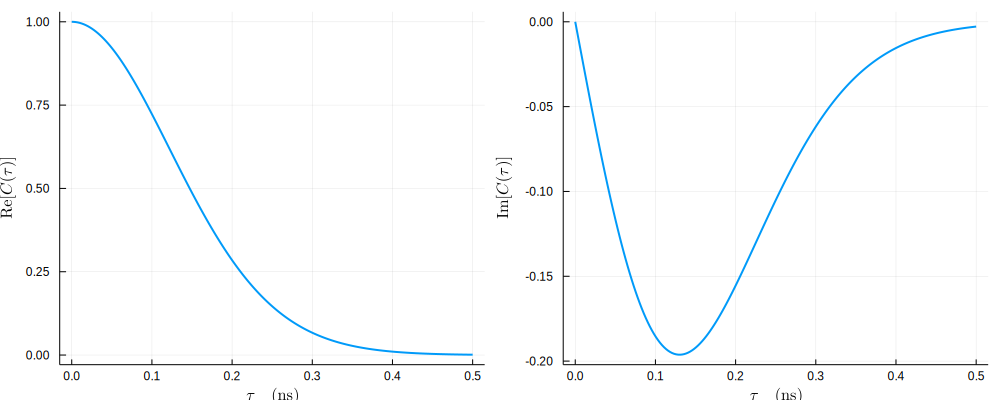

In [15]:
τ_axis = range(0,0.5,length=200)
pc = [polaron_correlation(τ, 4.0, bath) for τ in τ_axis]
p1 = plot(τ_axis, real.(pc), linewidth=2, label="")
xlabel!(L"\tau \quad (\mathrm{ns})")
ylabel!(L"\mathrm{Re}[C(\tau)]")
p2 = plot(τ_axis, imag.(pc), linewidth=2, label="")
xlabel!(L"\tau \quad (\mathrm{ns})")
ylabel!(L"\mathrm{Im}[C(\tau)]")
plot(p1, p2, layout=(1,2), size=(1000, 400))

And the characteristics of time scale of the bath is

In [13]:
cfun(x) = correlation(x, bath)
τsb, esb = τ_SB(cfun)
τb, eb = τ_B(cfun, 2000, τsb)
println("Before polaron transformation:")
println("τ_sb is " * @sprintf("%.2f", τsb))
println("τ_b is " * @sprintf("%.2e", τb))
cfun(x) = polaron_correlation(x, 4.0, bath)
τsb, esb = τ_SB(cfun)
τb, eb = τ_B(cfun, 2000, τsb)
println("After polaron transformation:")
println("τ_sb is " * @sprintf("%.2f", τsb))
println("τ_b is " * @sprintf("%.2e", τb))

Before polaron transformation:
τ_sb is 0.15
τ_b is 7.19e+00
After polaron transformation:
τ_sb is 5.94
τ_b is 1.10e-01


The conclusion is: the polaron transformation can help to indentify the part of bath which stays small outside the conventional weak coupling limit.